In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [7]:
def prepare_dataset(filename):
    '''
    Extract data and preprocess it
    '''
    df = pd.read_csv(filename)
    X1, X2, X, Y = [], [], [],[]
    # X1 = df.X1.to_list()
    # X2 = df.X2.to_list()
    for item, rows in df.iterrows():
        X1.append(rows['X1'])
        X2.append(rows['X2'])

    for i in range(len(X1)):
        X.append([1,X2[i]/200]) # Normalize 
        Y.append([X1[i]])

    X = np.array(X)
    Y = np.array(Y)
    #theta1_theta2 is (XTX)-1*XTY | Inverse(X * Transpose(X)) * ( Y * Transpose(X))
    theta1_theta2 = np.linalg.inv(X.T@X)@X.T@Y
    return X,Y, theta1_theta2

In [8]:
X,Y, theta1_theta2 =  prepare_dataset('data/health.csv')
print(theta1_theta2)

[[8.71590455]
 [1.01599417]]


## Momentum Algorithm

The loss at the end of training SGD is == 2.7757633637980064
The loss at the end of training Momentum is == 2.675511842982811


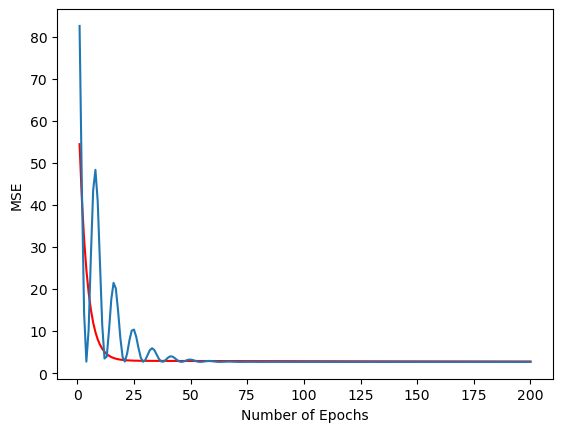

[[7.7135431 ]
 [2.69763047]]
[[8.71546515]
 [1.01629193]]


In [12]:
# Implementation of the momentum

np.random.seed(20)


EPOCHS = 200 # number of epochs
LR = 1e-1 # Learning Rate
epsilon = 0.9
BATCH_SIZE = X.shape[0] # Batch Size


theta_sgd = np.random.randn(X.shape[1],1) # Randomly initialize our theta to the shape of our X
theta_momentum = np.random.randn(X.shape[1],1)

v_sgd = np.zeros((X.shape[1],1))
v_momentum = np.zeros((X.shape[1],1))

loss_sgd = []
loss_momentum = []

for i in range(EPOCHS):
    epoch_loss_sgd = 0.0
    epoch_loss_momentum = 0.0
    for b in range(0, len(X), BATCH_SIZE):
        d_theta_sgd = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_sgd - Y[b:BATCH_SIZE])) / BATCH_SIZE # Calculates the partial derivate of loss in respective to theta
        d_theta_momentum = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_momentum - Y[b:BATCH_SIZE])) / BATCH_SIZE ## Gradient descent step

        v_sgd = - (LR * d_theta_sgd)
        v_momentum = epsilon*v_momentum - (LR*d_theta_momentum)

        theta_sgd += v_sgd # Gradient Descent step
        theta_momentum += v_momentum

 
        epoch_loss_sgd += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_sgd)).mean()) ## Mean Square Error
        epoch_loss_momentum += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_momentum)).mean()) ## Mean Square Error
    
    loss_sgd.append(epoch_loss_sgd)
    loss_momentum.append(epoch_loss_momentum)


print("The loss at the end of training SGD is ==",loss_sgd[-1])
print("The loss at the end of training Momentum is ==",loss_momentum[-1])

plt.plot(range(1, EPOCHS+1),loss_sgd, color='red')
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')

plt.plot(range(1, EPOCHS+1),loss_momentum)
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')

plt.show()
print(theta_sgd)
print(theta_momentum)

## Nesterov Momentum Algorithm

The loss at the end of training SGD is == 2.7757633637980064
The loss at the end of training Momentum is == 2.6755120004361674


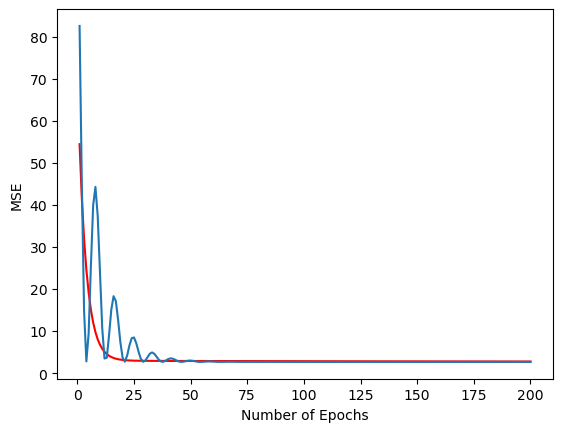

[[7.7135431 ]
 [2.69763047]]
[[8.71434175]
 [1.01847088]]


In [11]:
# Implementation of the nesterov momentum

np.random.seed(20)


EPOCHS = 200 # number of epochs
LR = 1e-1 # Learning Rate
epsilon = 0.9
BATCH_SIZE = X.shape[0] # Batch Size


theta_sgd = np.random.randn(X.shape[1],1) # Randomly initialize our theta to the shape of our X
theta_momentum = np.random.randn(X.shape[1],1)

v_sgd = np.zeros((X.shape[1],1))
v_momentum = np.zeros((X.shape[1],1))

loss_sgd = []
loss_momentum = []

for i in range(EPOCHS):
    epoch_loss_sgd = 0.0
    epoch_loss_momentum = 0.0
    for b in range(0, len(X), BATCH_SIZE):
        d_theta_sgd = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_sgd - Y[b:BATCH_SIZE])) / BATCH_SIZE # Calculates the partial derivate of loss in respective to theta
        d_theta_momentum = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_momentum - Y[b:BATCH_SIZE])) / BATCH_SIZE ## Gradient descent step
        d_theta_momentum_prime = d_theta_momentum + LR*v_momentum # Get theta_prime
        
        v_sgd = - (LR * d_theta_sgd)
        v_momentum = epsilon*v_momentum - (LR*d_theta_momentum_prime) # use theta_prime to get V

        theta_sgd += v_sgd # Gradient Descent step
        theta_momentum += v_momentum

 
        epoch_loss_sgd += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_sgd)).mean()) ## Mean Square Error
        epoch_loss_momentum += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_momentum)).mean()) ## Mean Square Error
    
    loss_sgd.append(epoch_loss_sgd)
    loss_momentum.append(epoch_loss_momentum)


print("The loss at the end of training SGD is ==",loss_sgd[-1])
print("The loss at the end of training Nesterov momentum is ==",loss_momentum[-1])

plt.plot(range(1, EPOCHS+1),loss_sgd, color='red')
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')

plt.plot(range(1, EPOCHS+1),loss_momentum)
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')

plt.show()
print(theta_sgd)
print(theta_momentum)

## AdaGrad Algorithm

The loss at the end of training SGD is == 2.844785359762142
The loss at the end of training Momentum is == 2.6783556084832942
The loss at the end of training Adagrad is == 56.0583197822755


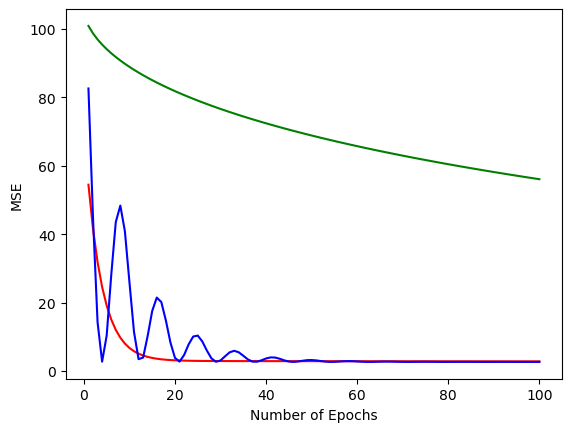

[[7.41341457]
 [3.20114112]]
[[8.65330785]
 [1.03211009]]
[[0.66519221]
 [2.30522879]]


In [18]:
# Implementation of the adagrad

np.random.seed(20)


EPOCHS = 200 # number of epochs
LR = 1e-1 # Learning Rate
epsilon = 0.9
BATCH_SIZE = X.shape[0] # Batch Size
sigma = 1e-6


theta_sgd = np.random.randn(X.shape[1],1) # Randomly initialize our theta to the shape of our X
theta_momentum = np.random.randn(X.shape[1],1)
theta_adagrad = np.random.randn(X.shape[1],1)

v_sgd = np.zeros((X.shape[1],1))
v_momentum = np.zeros((X.shape[1],1))
r_adagrad =  np.zeros((X.shape[1],1))

loss_sgd = []
loss_momentum = []
loss_adagrad = []

for i in range(EPOCHS):
    epoch_loss_sgd = 0.0
    epoch_loss_momentum = 0.0
    epoch_loss_adagrad = 0.0
    for b in range(0, len(X), BATCH_SIZE):
        d_theta_sgd = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_sgd - Y[b:BATCH_SIZE])) / BATCH_SIZE # Calculates the partial derivate of loss in respective to theta
        d_theta_momentum = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_momentum - Y[b:BATCH_SIZE])) / BATCH_SIZE
        d_theta_adagrad = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_adagrad - Y[b:BATCH_SIZE])) / BATCH_SIZE
        
        v_sgd = - (LR * d_theta_sgd)
        v_momentum = epsilon*v_momentum - (LR*d_theta_momentum)
        r_adagrad += (d_theta_adagrad * d_theta_adagrad)

        theta_sgd += v_sgd # Gradient Descent step
        theta_momentum += v_momentum 
        theta_adagrad -= (LR/(sigma+np.sqrt(r_adagrad))) * (d_theta_adagrad)
 
        epoch_loss_sgd += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_sgd)).mean()) ## Mean Square Error
        epoch_loss_momentum += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_momentum)).mean()) ## Mean Square Error
        epoch_loss_adagrad += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_adagrad)).mean()) ## Mean Square Error
    
    loss_sgd.append(epoch_loss_sgd)
    loss_momentum.append(epoch_loss_momentum)
    loss_adagrad.append(epoch_loss_adagrad)


print("The loss at the end of training SGD is ==",loss_sgd[-1])
print("The loss at the end of training Momentum is ==",loss_momentum[-1])
print("The loss at the end of training Adagrad is ==",loss_adagrad[-1])

plt.plot(range(1, EPOCHS+1),loss_sgd, color='red')
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')

plt.plot(range(1, EPOCHS+1),loss_momentum,color='blue')
plt.plot(range(1, EPOCHS+1),loss_adagrad,color='green')

plt.show()
print(theta_sgd)
print(theta_momentum)
print(theta_adagrad)

## RMSProp

The loss at the end of training SGD is == 2.7745123963781464
The loss at the end of training Momentum is == 8.975498611870666
The loss at the end of training Adagrad is == 6.507446212877149
The loss at the end of training RMSprop is == 2.8430773681693773


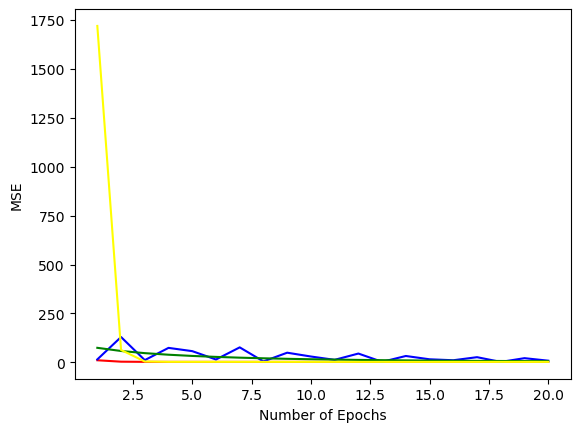

[[7.71981661]
 [2.68710557]]
[[ 7.10798731]
 [-0.50979752]]
[[4.2313735 ]
 [5.73388851]]
[[7.41018443]
 [3.18242857]]


In [21]:
# Implementation of the RMSprop

np.random.seed(20)


EPOCHS = 20 # number of epochs
LR = 1 # Learning Rate
epsilon = 0.9
BATCH_SIZE = X.shape[0] # Batch Size
sigma = 1e-6
rho = 0.999

theta_sgd = np.random.randn(X.shape[1],1) # Randomly initialize our theta to the shape of our X
theta_momentum = np.random.randn(X.shape[1],1)
theta_adagrad = np.random.randn(X.shape[1],1)
theta_rmsprop = np.random.randn(X.shape[1],1)

v_sgd = np.zeros((X.shape[1],1))
v_momentum = np.zeros((X.shape[1],1))
r_adagrad =  np.zeros((X.shape[1],1))
r_rmsprod =  np.zeros((X.shape[1],1))

loss_sgd = []
loss_momentum = []
loss_adagrad = []
loss_rmsprop = []

for i in range(EPOCHS):
    epoch_loss_sgd = 0.0
    epoch_loss_momentum = 0.0
    epoch_loss_adagrad = 0.0
    epoch_loss_rmsprop = 0.0

    for b in range(0, len(X), BATCH_SIZE):
        d_theta_sgd = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_sgd - Y[b:BATCH_SIZE])) / BATCH_SIZE # Calculates the partial derivate of loss in respective to theta
        d_theta_momentum = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_momentum - Y[b:BATCH_SIZE])) / BATCH_SIZE
        d_theta_adagrad = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_adagrad - Y[b:BATCH_SIZE])) / BATCH_SIZE
        d_theta_rmsprop = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_rmsprop - Y[b:BATCH_SIZE])) / BATCH_SIZE
        
        v_sgd = - (LR * d_theta_sgd)
        v_momentum = epsilon*v_momentum - (LR*d_theta_momentum)
        r_adagrad += (d_theta_adagrad * d_theta_adagrad)
        r_rmsprod  = (rho * r_rmsprod) + (1-rho) * (d_theta_rmsprop * d_theta_rmsprop)

        theta_sgd += v_sgd # Gradient Descent step
        theta_momentum += v_momentum 
        theta_adagrad -= (LR/(sigma+np.sqrt(r_adagrad))) * (d_theta_adagrad)
        theta_rmsprop -= (LR/(np.sqrt(sigma+r_rmsprod))) * (d_theta_rmsprop)

        epoch_loss_sgd += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_sgd)).mean()) ## Mean Square Error
        epoch_loss_momentum += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_momentum)).mean()) ## Mean Square Error
        epoch_loss_adagrad += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_adagrad)).mean()) ## Mean Square Error
        epoch_loss_rmsprop += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_rmsprop)).mean())

    loss_sgd.append(epoch_loss_sgd)
    loss_momentum.append(epoch_loss_momentum)
    loss_adagrad.append(epoch_loss_adagrad)
    loss_rmsprop.append(epoch_loss_rmsprop)

print("The loss at the end of training SGD is ==",loss_sgd[-1])
print("The loss at the end of training Momentum is ==",loss_momentum[-1])
print("The loss at the end of training Adagrad is ==",loss_adagrad[-1])
print("The loss at the end of training RMSprop is ==",loss_rmsprop[-1])

plt.plot(range(1, EPOCHS+1),loss_sgd, color='red')
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')

plt.plot(range(1, EPOCHS+1),loss_momentum,color='blue')
plt.plot(range(1, EPOCHS+1),loss_adagrad,color='green')
plt.plot(range(1, EPOCHS+1),loss_rmsprop,color='yellow')

plt.show()
print(theta_sgd)
print(theta_momentum)
print(theta_adagrad)
print(theta_rmsprop)

## Adam (Adaptive Moment) Optimization Algorithm

The loss at the end of training SGD is == 2.908798974021565
The loss at the end of training Momentum is == 2.681779507958686
The loss at the end of training Adagrad is == 100.06980812143814
The loss at the end of training RMSprop is == 6.950501675437355
The loss at the end of training Adam is == 39.65017715617394


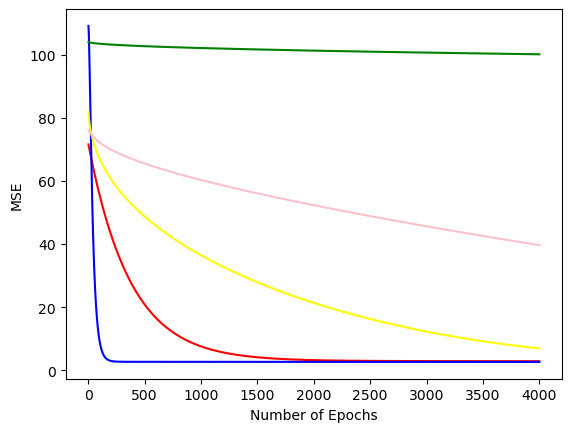

[[7.16349012]
 [3.55660473]]
[[8.46527391]
 [1.43647082]]
[[-0.96021454]
 [ 0.68429924]]
[[5.33132767]
 [3.36679131]]
[[2.07876992]
 [1.97924827]]


In [51]:
# Implementation of the Adam

np.random.seed(20)


EPOCHS = 4000 # number of epochs
LR = 0.001 # Learning Rate
epsilon = 0.9
BATCH_SIZE = X.shape[0] # Batch Size
sigma = 1e-08
rho_1 = 0.9
rho_2 = 0.999

theta_sgd = np.random.randn(X.shape[1],1) # Randomly initialize our theta to the shape of our X
theta_momentum = np.random.randn(X.shape[1],1)
theta_adagrad = np.random.randn(X.shape[1],1)
theta_rmsprop = np.random.randn(X.shape[1],1)
theta_adam = np.random.randn(X.shape[1],1)

v_sgd = np.zeros((X.shape[1],1))
v_momentum = np.zeros((X.shape[1],1))
r_adagrad =  np.zeros((X.shape[1],1))
r_rmsprod =  np.zeros((X.shape[1],1))
s_adam = np.zeros((X.shape[1],1))
r_adam = np.zeros((X.shape[1],1))

loss_sgd = []
loss_momentum = []
loss_adagrad = []
loss_rmsprop = []
loss_adam = []

for i in range(EPOCHS):
    epoch_loss_sgd = 0.0
    epoch_loss_momentum = 0.0
    epoch_loss_adagrad = 0.0
    epoch_loss_rmsprop = 0.0
    epoch_loss_adam = 0.0

    for b in range(0, len(X), BATCH_SIZE):
        d_theta_sgd = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_sgd - Y[b:BATCH_SIZE])) / BATCH_SIZE # Calculates the partial derivate of loss in respective to theta
        d_theta_momentum = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_momentum - Y[b:BATCH_SIZE])) / BATCH_SIZE
        d_theta_adagrad = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_adagrad - Y[b:BATCH_SIZE])) / BATCH_SIZE
        d_theta_rmsprop = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_rmsprop - Y[b:BATCH_SIZE])) / BATCH_SIZE
        d_theta_adam = (X[b:b+BATCH_SIZE].T@(X[b:b+BATCH_SIZE]@theta_adam - Y[b:BATCH_SIZE])) / BATCH_SIZE

        v_sgd = - (LR * d_theta_sgd)
        v_momentum = epsilon*v_momentum - (LR*d_theta_momentum)
        r_adagrad += (d_theta_adagrad * d_theta_adagrad)
        r_rmsprod  = (rho * r_rmsprod) + (1-rho) * (d_theta_rmsprop * d_theta_rmsprop)
        s_adam = (rho_1 * s_adam) + ((1-rho_1) * d_theta_adam)
        r_adam = (rho_2 * r_adam) + ((1-rho_2) * (d_theta_adam ** 2)) 
        s_adam_hat = s_adam/(1-rho_1**(b+1))
        r_adam_hat = r_adam/(1-rho_2 ** (b+1))

        theta_sgd += v_sgd # Gradient Descent step
        theta_momentum += v_momentum 
        theta_adagrad -= (LR/(sigma+np.sqrt(r_adagrad))) * (d_theta_adagrad)
        theta_rmsprop -= (LR/(np.sqrt(sigma+r_rmsprod))) * (d_theta_rmsprop)
        theta_adam = theta_adam - (LR* (s_adam_hat/(np.sqrt(r_adam_hat) + sigma)))

        epoch_loss_sgd += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_sgd)).mean()) ## Mean Square Error
        epoch_loss_momentum += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_momentum)).mean()) ## Mean Square Error
        epoch_loss_adagrad += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_adagrad)).mean()) ## Mean Square Error
        epoch_loss_rmsprop += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_rmsprop)).mean())
        epoch_loss_adam += (np.square(Y[b:BATCH_SIZE]-(X[b:b+BATCH_SIZE]@theta_adam)).mean())

    loss_sgd.append(epoch_loss_sgd)
    loss_momentum.append(epoch_loss_momentum)
    loss_adagrad.append(epoch_loss_adagrad)
    loss_rmsprop.append(epoch_loss_rmsprop)
    loss_adam.append(epoch_loss_adam)

print("The loss at the end of training SGD is ==",loss_sgd[-1])
print("The loss at the end of training Momentum is ==",loss_momentum[-1])
print("The loss at the end of training Adagrad is ==",loss_adagrad[-1])
print("The loss at the end of training RMSprop is ==",loss_rmsprop[-1])
print("The loss at the end of training Adam is ==",loss_adam[-1])

plt.plot(range(1, EPOCHS+1),loss_sgd, color='red')
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')

plt.plot(range(1, EPOCHS+1),loss_momentum,color='blue')
plt.plot(range(1, EPOCHS+1),loss_adagrad,color='green')
plt.plot(range(1, EPOCHS+1),loss_rmsprop,color='yellow')
plt.plot(range(1, EPOCHS+1),loss_adam,color='pink')

plt.show()
print(theta_sgd)
print(theta_momentum)
print(theta_adagrad)
print(theta_rmsprop)
print(theta_adam)